## **Regression**
Car price prediction

**Importing Libraries**

In [93]:
import matplotlib.pyplot as plt
import pandas as pd
import pylab as pl
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
import seaborn as sns
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

%matplotlib inline

**1. Reading cars Data**

In [31]:
path='/'
data=pd.read_csv(path+'train.csv')

**2. Exploaratory Analysis**

In [32]:
data.head()

,ID,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags
0,45654403,13328,1399,LEXUS,RX 450,2010,Jeep,Yes,Hybrid,3.5,186005 km,6.0,Automatic,4x4,04-May,Left wheel,Silver,12
1,44731507,16621,1018,CHEVROLET,Equinox,2011,Jeep,No,Petrol,3,192000 km,6.0,Tiptronic,4x4,04-May,Left wheel,Black,8
2,45774419,8467,-,HONDA,FIT,2006,Hatchback,No,Petrol,1.3,200000 km,4.0,Variator,Front,04-May,Right-hand drive,Black,2
3,45769185,3607,862,FORD,Escape,2011,Jeep,Yes,Hybrid,2.5,168966 km,4.0,Automatic,4x4,04-May,Left wheel,White,0
4,45809263,11726,446,HONDA,FIT,2014,Hatchback,Yes,Petrol,1.3,91901 km,4.0,Automatic,Front,04-May,Left wheel,Silver,4


In [33]:
print('Data',data.dtypes)

Data ID                    int64
Price                 int64
Levy                 object
Manufacturer         object
Model                object
Prod. year            int64
Category             object
Leather interior     object
Fuel type            object
Engine volume        object
Mileage              object
Cylinders           float64
Gear box type        object
Drive wheels         object
Doors                object
Wheel                object
Color                object
Airbags               int64
dtype: object


**counting null values in each column**

In [34]:
for i in data.columns:
    print(i,'\t:',sum(data[i].isnull()))

ID 	: 0
Price 	: 0
Levy 	: 0
Manufacturer 	: 0
Model 	: 0
Prod. year 	: 0
Category 	: 0
Leather interior 	: 0
Fuel type 	: 0
Engine volume 	: 0
Mileage 	: 0
Cylinders 	: 0
Gear box type 	: 0
Drive wheels 	: 0
Doors 	: 0
Wheel 	: 0
Color 	: 0
Airbags 	: 0


In [35]:
data.describe()

,ID,Price,Prod. year,Cylinders,Airbags
count,1.923700e+04,1.923700e+04,19237.000000,19237.000000,19237.000000
mean,4.557654e+07,1.855593e+04,2010.912824,4.582991,6.582627
std,9.365914e+05,1.905813e+05,5.668673,1.199933,4.320168
min,2.074688e+07,1.000000e+00,1939.000000,1.000000,0.000000
25%,4.569837e+07,5.331000e+03,2009.000000,4.000000,4.000000
50%,4.577231e+07,1.317200e+04,2012.000000,4.000000,6.000000
75%,4.580204e+07,2.207500e+04,2015.000000,4.000000,12.000000
max,4.581665e+07,2.630750e+07,2020.000000,16.000000,16.000000


In [36]:
data.describe(include=['object'])

,Levy,Manufacturer,Model,Category,Leather interior,Fuel type,Engine volume,Mileage,Gear box type,Drive wheels,Doors,Wheel,Color
count,19237,19237,19237,19237,19237,19237,19237,19237,19237,19237,19237,19237,19237
unique,559,65,1590,11,2,7,107,7687,4,3,3,2,16
top,-,HYUNDAI,Prius,Sedan,Yes,Petrol,2,0 km,Automatic,Front,04-May,Left wheel,Black
freq,5819,3769,1083,8736,13954,10150,3916,721,13514,12874,18332,17753,5033


In [38]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19237 entries, 0 to 19236
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Price             19237 non-null  int64  
 1   Levy              19237 non-null  object 
 2   Manufacturer      19237 non-null  object 
 3   Model             19237 non-null  object 
 4   Prod. year        19237 non-null  int64  
 5   Category          19237 non-null  object 
 6   Leather interior  19237 non-null  object 
 7   Fuel type         19237 non-null  object 
 8   Engine volume     19237 non-null  object 
 9   Mileage           19237 non-null  object 
 10  Cylinders         19237 non-null  float64
 11  Gear box type     19237 non-null  object 
 12  Drive wheels      19237 non-null  object 
 13  Doors             19237 non-null  object 
 14  Wheel             19237 non-null  object 
 15  Color             19237 non-null  object 
 16  Airbags           19237 non-null  int64 

In [37]:
data.drop(columns=['ID'],axis=1,inplace=True)

**3. Converting all categorical values into numeric values and data normalization**

In [44]:
for i in data.columns:
  if data[i].dtype=='object':
    le = LabelEncoder()
    dt = le.fit_transform(data[i])
    data.drop(i, axis=1, inplace=True)
    data[i]=dt
  data[i] = (data[i] - data[i].min()) / (data[i].max() - data[i].min())

In [45]:
data.head()

,Price,Prod. year,Cylinders,Airbags,Levy,Manufacturer,Model,Category,Leather interior,Fuel type,Engine volume,Mileage,Gear box type,Drive wheels,Doors,Wheel,Color
0,0.000507,0.876543,0.333333,0.750,0.204301,0.500000,0.781624,0.4,1.0,0.333333,0.594340,0.369243,0.000000,0.0,0.5,0.0,0.800000
1,0.000632,0.888889,0.333333,0.500,0.007168,0.125000,0.414097,0.4,0.0,0.833333,0.528302,0.385116,0.666667,0.0,0.5,0.0,0.066667
2,0.000322,0.827160,0.200000,0.125,0.000000,0.328125,0.430459,0.3,0.0,0.833333,0.207547,0.408535,1.000000,0.5,0.5,1.0,0.066667
3,0.000137,0.888889,0.200000,0.000,0.917563,0.250000,0.415985,0.4,1.0,0.333333,0.433962,0.313947,0.000000,0.0,0.5,0.0,0.933333
4,0.000446,0.925926,0.200000,0.250,0.655914,0.328125,0.430459,0.3,1.0,0.833333,0.207547,0.962269,0.000000,0.5,0.5,0.0,0.800000


**4. Plotting data column vs Price**

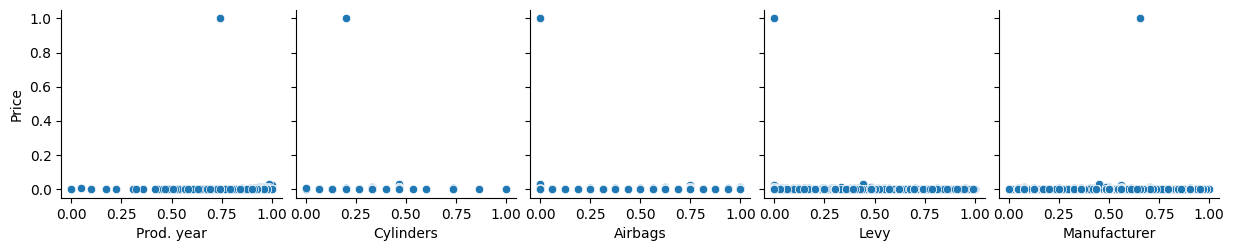

In [46]:
sns.pairplot(data, x_vars=data.columns[1:6], y_vars='Price', kind='scatter')
plt.show()

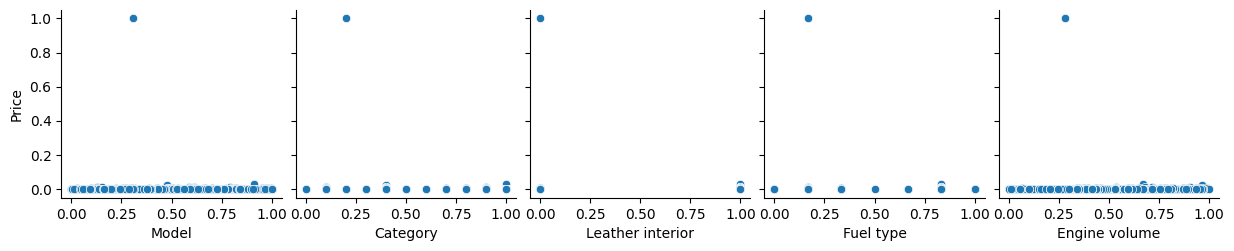

In [47]:
sns.pairplot(data, x_vars=data.columns[6:11], y_vars='Price', kind='scatter')
plt.show()

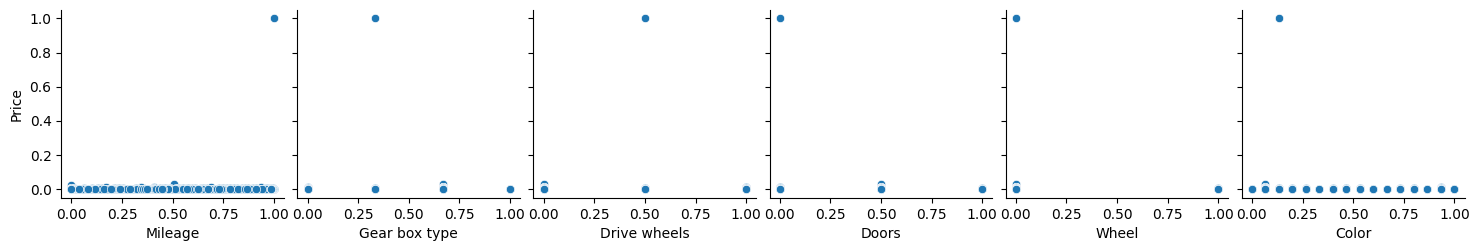

In [48]:
sns.pairplot(data, x_vars=data.columns[11:], y_vars='Price', kind='scatter')
plt.show()

In [50]:
data.corr()

,Price,Prod. year,Cylinders,Airbags,Levy,Manufacturer,Model,Category,Leather interior,Fuel type,Engine volume,Mileage,Gear box type,Drive wheels,Doors,Wheel,Color
Price,1.000000,0.012982,0.007518,-0.012824,-0.008953,-0.003886,0.000773,-0.019721,0.000754,-0.012419,0.009039,0.025553,0.016340,-0.003419,-0.030869,-0.014649,-0.010295
Prod. year,0.012982,1.000000,-0.096797,0.236969,0.431131,-0.050922,0.062975,0.071538,0.390066,0.058961,-0.032897,0.190448,-0.217766,-0.125912,0.176701,-0.227172,0.009943
Cylinders,0.007518,-0.096797,1.000000,0.176868,-0.275336,-0.089523,-0.005475,-0.066238,0.202473,0.081037,0.785084,-0.048386,0.058432,-0.208963,-0.028235,-0.093550,-0.121727
Airbags,-0.012824,0.236969,0.176868,1.000000,-0.020734,0.180210,-0.102173,0.131772,0.165023,0.081676,0.241104,0.040483,0.107086,-0.023810,0.046003,-0.147904,-0.075554
Levy,-0.008953,0.431131,-0.275336,-0.020734,1.000000,-0.081375,0.072233,0.084146,0.310644,-0.040867,-0.236295,0.111551,-0.286549,0.003354,0.128301,-0.272462,0.075064
Manufacturer,-0.003886,-0.050922,-0.089523,0.180210,-0.081375,1.000000,-0.019788,-0.038340,-0.174997,-0.086630,-0.044986,-0.035906,0.055909,-0.065689,0.047570,0.089016,0.032720
Model,0.000773,0.062975,-0.005475,-0.102173,0.072233,-0.019788,1.000000,-0.165528,-0.001230,-0.166124,0.028049,0.010647,-0.056702,-0.186701,0.072332,-0.033578,0.072297
Category,-0.019721,0.071538,-0.066238,0.131772,0.084146,-0.038340,-0.165528,1.000000,0.091701,0.112440,0.011428,0.036092,-0.011968,0.213743,0.220697,-0.120444,-0.019184
Leather interior,0.000754,0.390066,0.202473,0.165023,0.310644,-0.174997,-0.001230,0.091701,1.000000,-0.029814,0.285960,0.114373,-0.288992,-0.090536,0.093915,-0.348970,-0.055987
Fuel type,-0.012419,0.058961,0.081037,0.081676,-0.040867,-0.086630,-0.166124,0.112440,-0.029814,1.000000,0.007755,0.031756,0.098677,-0.044218,-0.046363,0.080883,-0.077919


**3. Train Test Split**

In [51]:
X=data[data.columns[1:]]
Y=data.Price
X_train, X_test, y_train, y_test=train_test_split(X, Y, test_size=0.3, random_state=100)
X_train.shape


(13465, 16)

In [58]:
print('\nX_train Shape',X_train.shape ,'\nX_test Shape',X_test.shape)


X_train Shape (13465, 16) 
X_test Shape (5772, 16)


**4. Applying ML Models to predict price**
> **4.1 Apply Linear Regression on each columns**

In [91]:
lr_res={}
models_lr={}
for i in X_train.columns:
  models_lr[i]=LinearRegression()
  models_lr[i].fit(np.array(X_train[i]).reshape(-1,1),y_train)
  y_pred=models_lr[i].predict(np.array(X_test[i]).reshape(-1,1))
  lr_res[i]={'mse':mean_squared_error(y_test, y_pred),'r2':r2_score(y_test, y_pred)}

> **Linear Regression Visualization**



In [94]:
variables = list(lr_res.keys())
mse = [lr_res[i]['mse'] for i in variables]
r2 = [lr_res[i]['r2'] for i in variables]

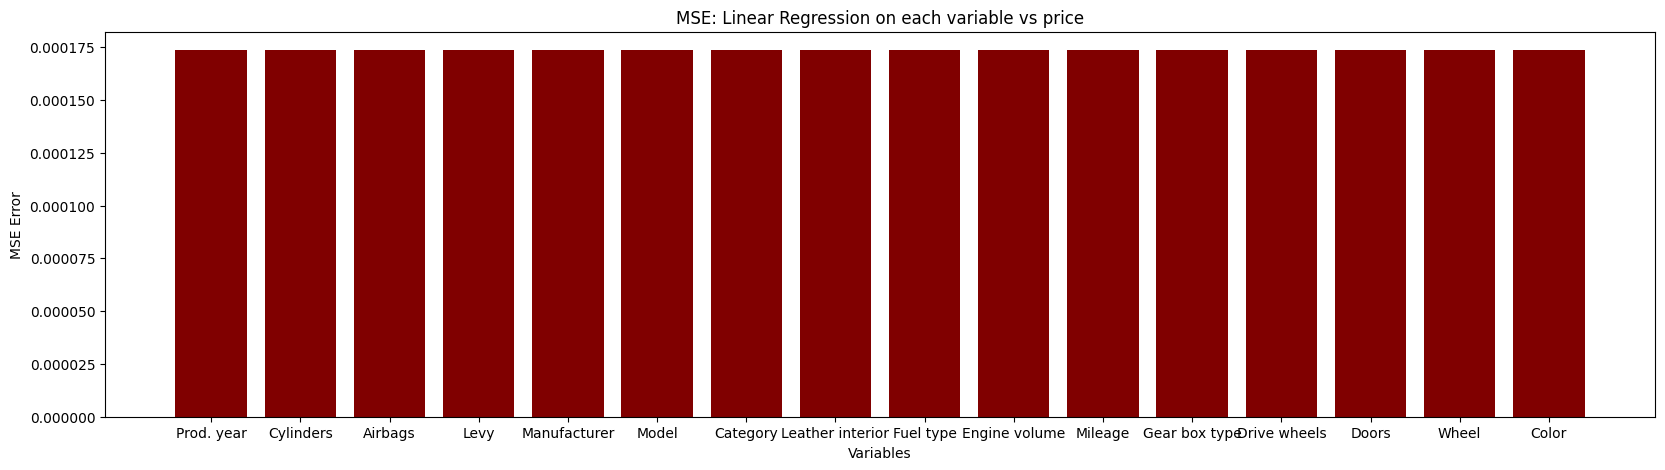

In [101]:
fig = plt.figure(figsize = (20, 5))
plt.bar(variables, mse, color ='maroon')
plt.xlabel("Variables")
plt.ylabel("MSE Error")
plt.title("MSE: Linear Regression on each variable vs price")
plt.show()

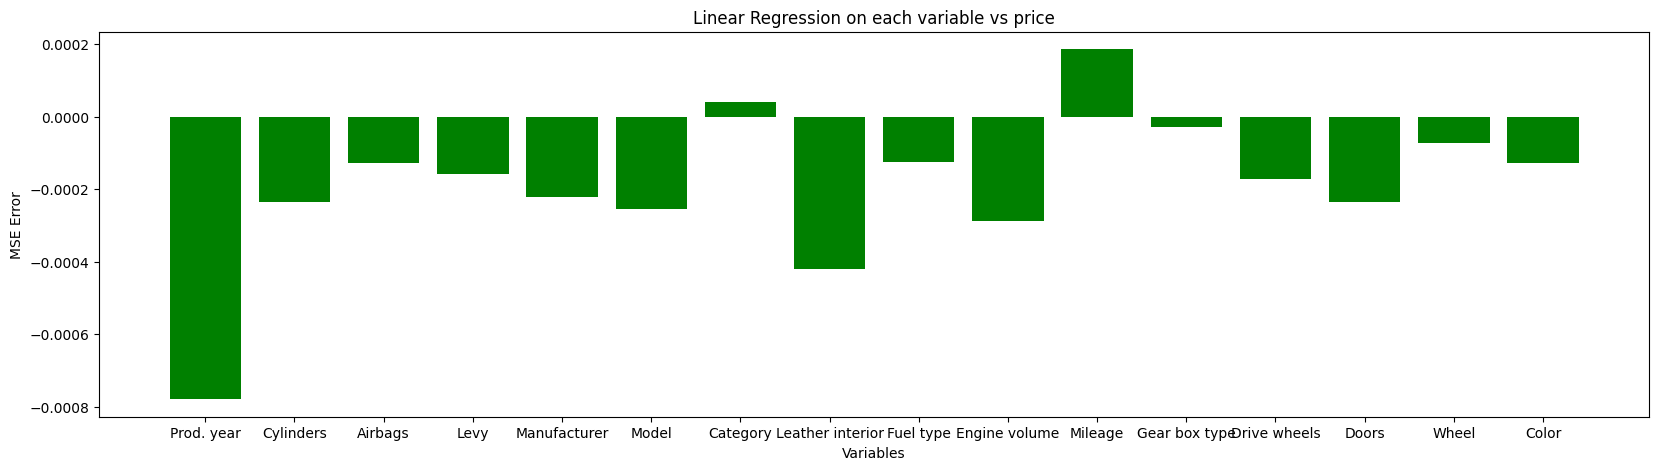

In [100]:
fig = plt.figure(figsize = (20, 5))
plt.bar(variables, r2, color ='green')
plt.xlabel("Variables")
plt.ylabel("MSE Error")
plt.title("R2 score: Linear Regression on each variable vs price")
plt.show()

> **4.2 Apply multi variate Linear Regression**



In [103]:
mlr=LinearRegression()
mlr.fit(X_train,y_train)
y_pred=mlr.predict(X_test)
mlr_res={'mse':mean_squared_error(y_test, y_pred),'r2':r2_score(y_test, y_pred)}

In [104]:
print('MSE:',mlr_res['mse'],'\nR2:',mlr_res['r2'])

MSE: 0.00017345599720603182 
R2: 0.00014917111214429735


> **4.3 DT Regression**

In [106]:
dtr = DecisionTreeRegressor()
dtr = dtr.fit(X_train,y_train)
y_pred=dtr.predict(X_test)
dtr_res={'mse':mean_squared_error(y_test, y_pred),'r2':r2_score(y_test, y_pred)}

In [107]:
print('MSE:',dtr_res['mse'],'\nR2:',dtr_res['r2'])

MSE: 0.0001734648073823998 
R2: 9.838669254469412e-05
